# <img style="float: left; padding-right: 20px; height: 70px" src="https://i.imgur.com/cMzxwTN.jpg"> Fundamentos de Machine Learning
## Actividad 2, Sesion 3
**Universidad Privada Boliviana**<br/>
**Diplomado en Machine Learning y Ciencia de Datos**<br/>


El objetivo de este ejercicio es visualizar el árbol de decisión que se crea al realizar la clasificación o regresión del árbol de decisión. 

## Descripción del conjunto de datos

Estamos tratando de predecir el ganador de las elecciones presidenciales de 2016 (Trump vs. Clinton) en cada condado de los EE. UU. Para hacer esto, consideraremos varios predictores que incluyen "minoría": el porcentaje de residentes que son minorías y "licenciatura": el porcentaje de adultos residentes con una licenciatura (o superior).

## Instrucciones

- Lea el archivo de datos `county_election_train.csv` 
    
- Cree la variable de respuesta basada en las columnas `trump` y `clinton`.
    
- Inicializar un clasificador de árbol de decisión de profundidad 3 y ajustarlo a los datos de entrenamiento.
    
- Visualizar el Árbol de Decisión.
    



In [1]:

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 20)
plt.rcParams["figure.figsize"] = (12,8)


In [2]:

elect_train = pd.read_csv("county_election_train.csv")  
elect_test = pd.read_csv("county_election_test.csv")
elect_train.head()


,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,trump,clinton,votergap
0,Alabama,1001,Autauga County,50756,2.842,22.733,51.475,5.2,54366,13.8,21.9,28.6,34.1,91.8,186.5,73.436,23.957,49.479
1,Alabama,1003,Baldwin County,179878,4.550,12.934,51.261,5.5,49626,11.0,28.6,22.3,27.4,114.6,229.4,77.351,19.565,57.786
2,Alabama,1007,Bibb County,21587,2.409,23.930,46.110,6.6,39546,22.1,10.2,33.9,40.3,36.8,230.3,76.966,21.422,55.544
3,Alabama,1009,Blount County,58345,8.954,4.229,50.592,5.4,45567,21.9,12.3,28.0,34.6,88.9,205.3,89.852,8.470,81.382
4,Alabama,1011,Bullock County,10985,7.526,72.831,45.241,7.8,26580,34.5,14.1,31.7,43.0,17.5,211.2,24.229,75.090,-50.862


In [3]:
elect_test.head()

,state,fipscode,county,population,hispanic,minority,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,cancer,trump,clinton,votergap
0,Alabama,1005,Barbour County,29737,4.424,49.885,46.589,8.9,34971,25.4,13.6,31.8,44.4,31.0,223.3,52.271,46.660,5.611
1,Alabama,1025,Clarke County,26042,1.410,45.917,52.725,11.8,36620,19.9,11.9,27.5,38.2,20.9,239.4,54.955,44.156,10.799
2,Alabama,1031,Coffee County,48635,6.694,23.944,50.366,5.9,46931,16.9,23.2,28.7,33.7,73.6,204.0,77.146,20.446,56.701
3,Alabama,1039,Covington County,36678,1.610,15.940,51.793,7.1,36149,20.0,14.6,33.0,34.0,36.6,274.2,83.588,15.040,68.548
4,Alabama,1051,Elmore County,79233,2.815,24.266,51.448,5.1,54298,12.8,21.4,29.0,35.4,128.2,195.8,74.838,22.859,51.979


In [6]:

# Lunes: Random forest, Bagging
# 
# Creating the response variable
elect_train['won'] = 1*(elect_train['trump'] > elect_train['clinton'])
elect_test['won'] = 1*(elect_test['trump'] > elect_test['clinton'])
# Establecer las columnas minoritario y profesionales  como predictores de datos de train
X_train = elect_train[['minority', 'bachelor']]
#Establecer las columnas minoritario y profesionales como predictores de datos de test
X_test =  elect_test[['minority', 'bachelor']]

# Establezca la columna "won" como la variable de respuesta de entrenamiento 

y_train = elect_train['won']

# Establezca la columna "won" como la variable de respuesta de testeo 

y_test = elect_test['won']


# # Establecer todas las filas en los datos del train
# # donde el valor de "trump" es más que "clinton" como 1
# y_train = ___

# # Establecer todas las filas en los datos de test 
# # donde el valor de "trump" es más que "clinton" como 1
# y_test = ___


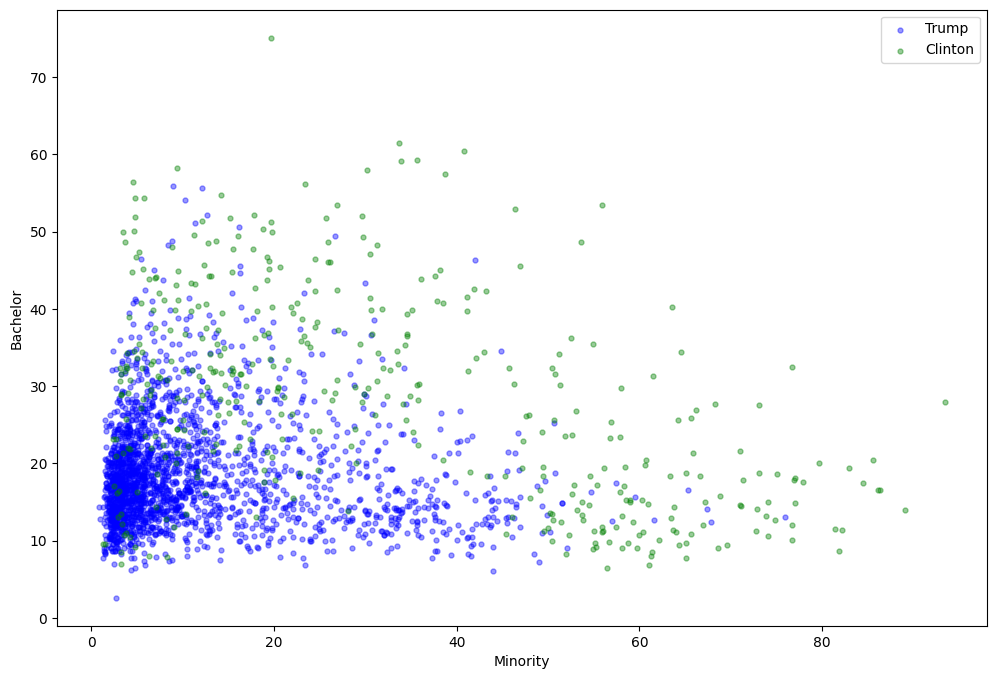

In [14]:
# Graficar los datos de entrenamiento para cada grupo de ganadores y perdedores
plt.scatter(elect_train['minority'][elect_train['won'] == 1], 
            elect_train['bachelor'][elect_train['won'] == 1],
            marker=".", color="blue", label="Trump", s=50, alpha=0.4)

plt.scatter(elect_train['minority'][elect_train['won'] == 0], 
            elect_train['bachelor'][elect_train['won'] == 0],
            marker=".", color="green", label="Clinton", s=50, alpha=0.4)

plt.xlabel("Minority")
plt.ylabel("Bachelor")
plt.legend()
plt.show()

In [10]:
# Inicializar un clasificador Árbol de decisión de profundidad 3 y elegir
# criterio de división para ser la entropía
dtree = DecisionTreeClassifier(max_depth=3, criterion='entropy')

# Ajustar el clasificador en los datos del tren
# pero solo use la columna minoritaria como variable predictora
dtree.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3)

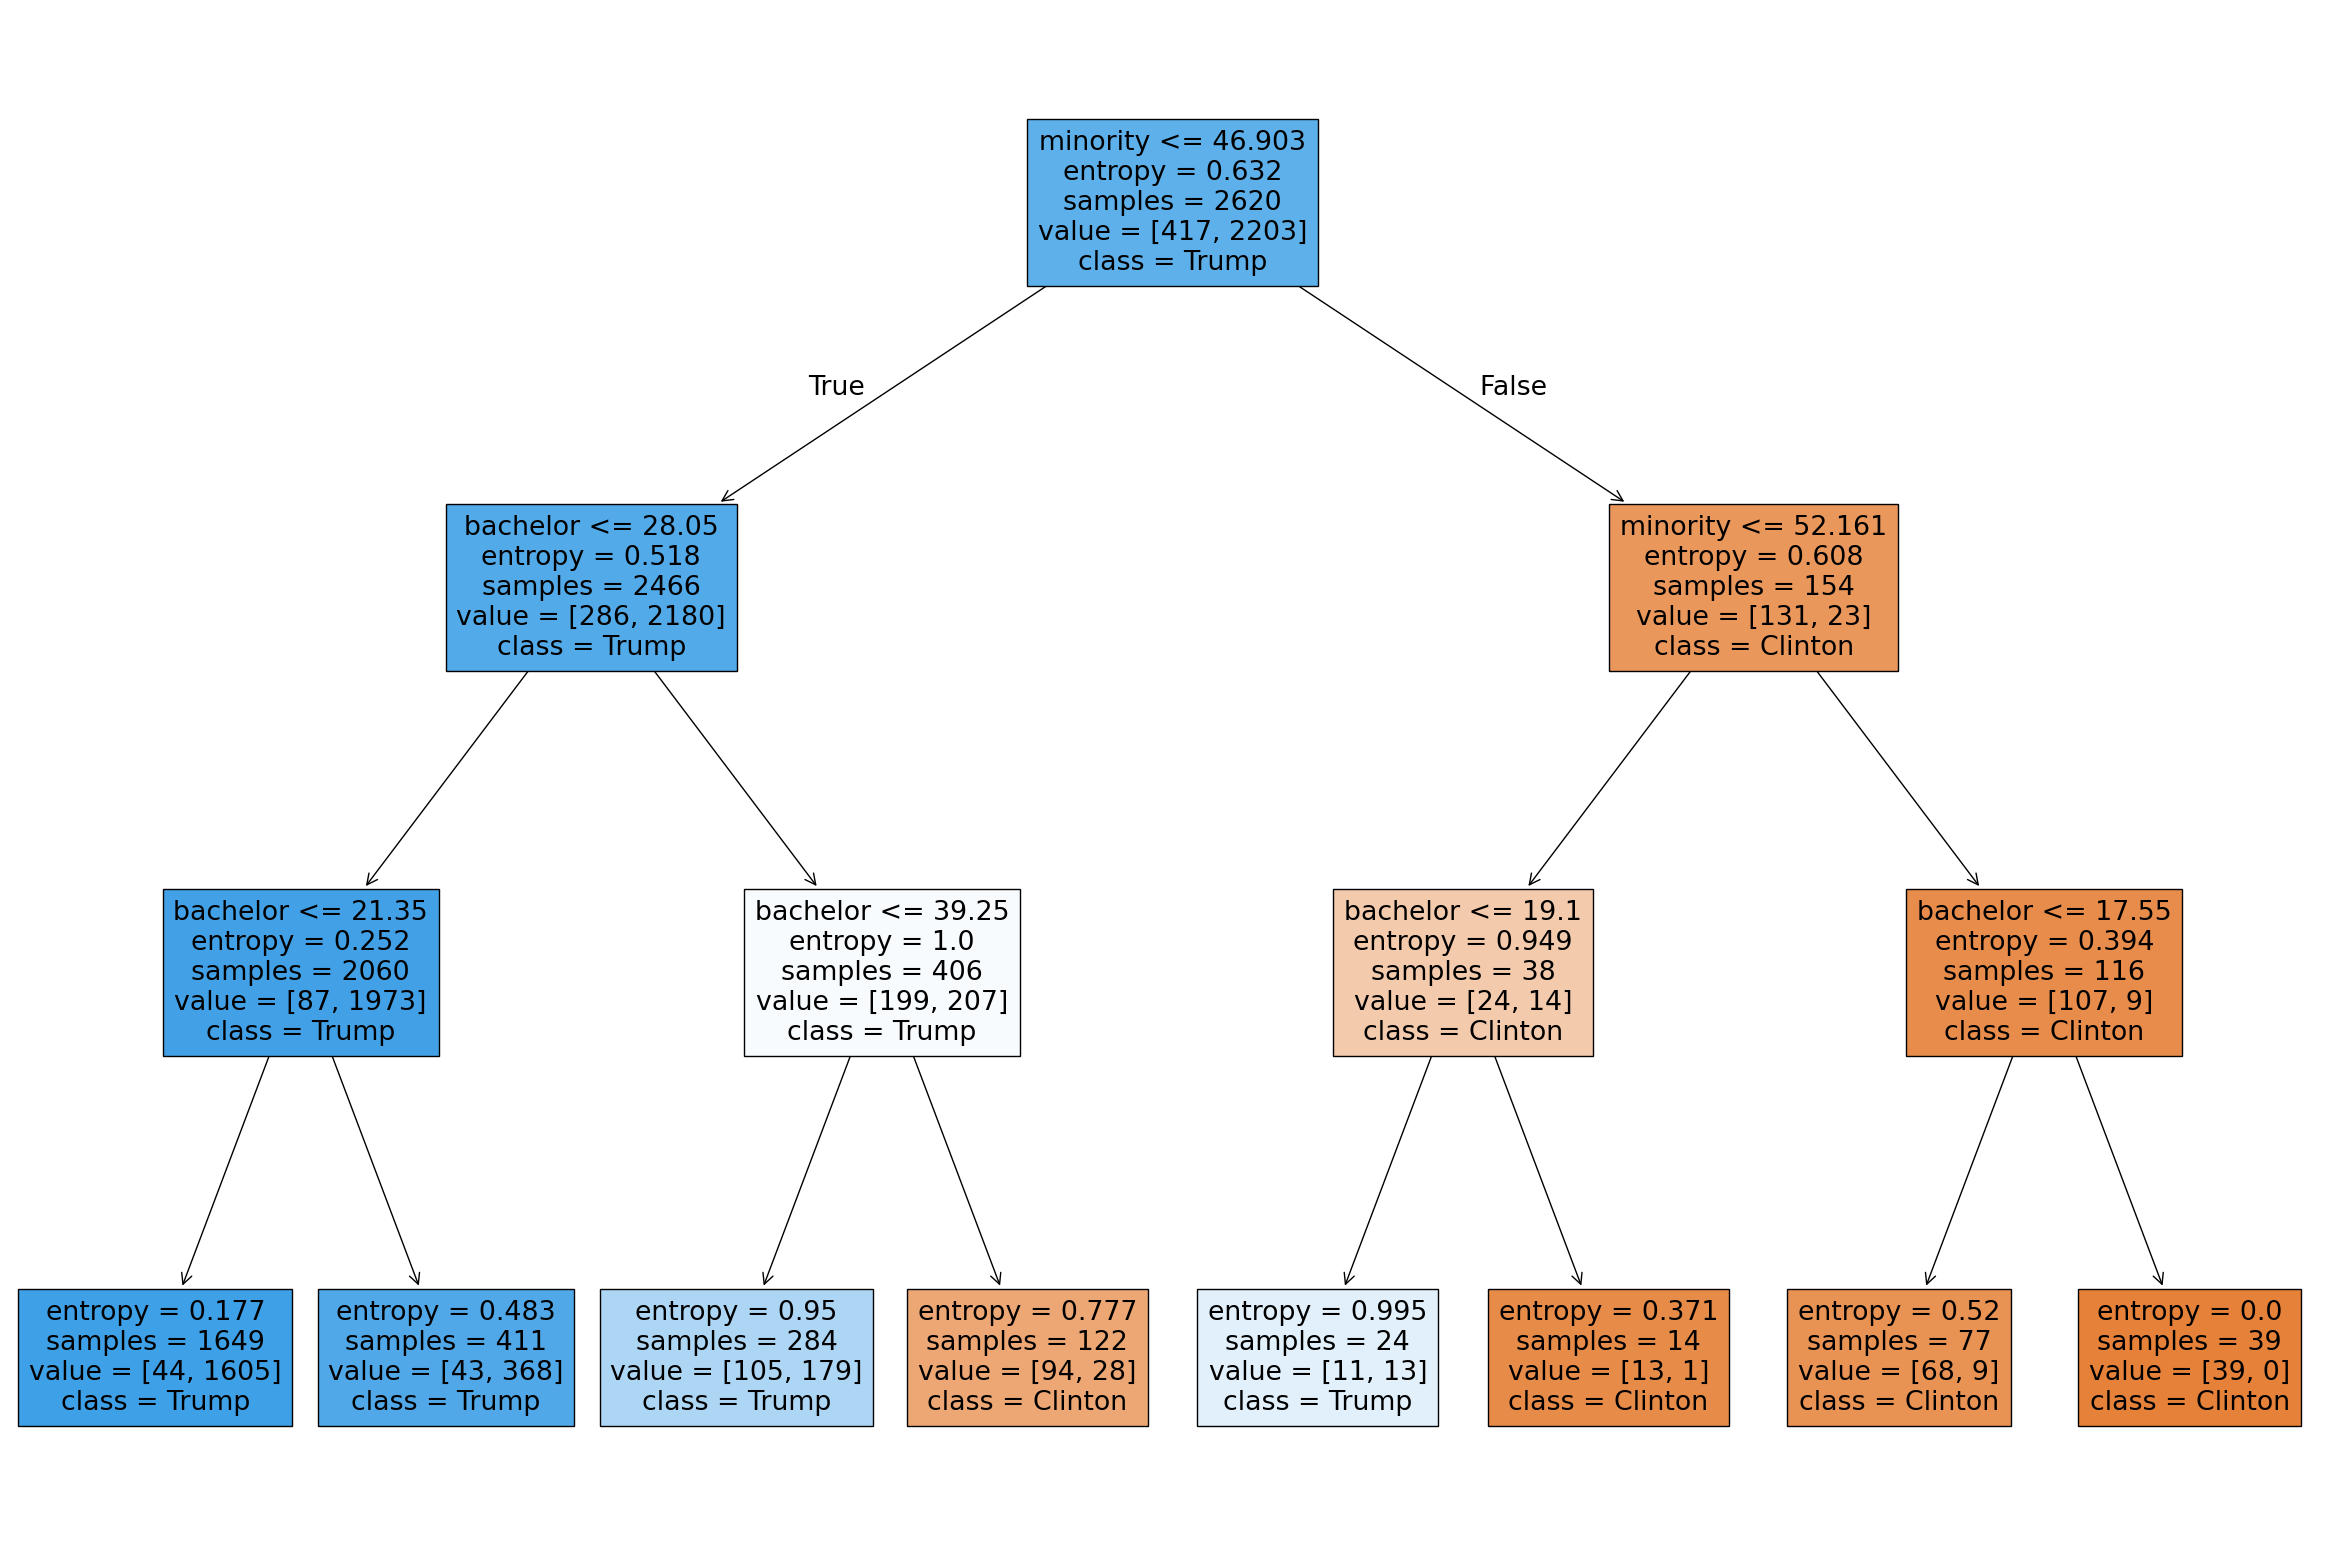

In [11]:

# Visualizar el árbol de decisión
plt.figure(figsize=(30, 20))
tree.plot_tree(dtree, filled=True, feature_names=['minority', 'bachelor'], class_names=['Clinton', 'Trump'])
plt.show()


In [12]:
# Calcular precisión en el conjunto de entrenamiento
train_accuracy = dtree.score(X_train, y_train)

# Calcular precisión en el conjunto de prueba
test_accuracy = dtree.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9080
Test Accuracy: 0.8943


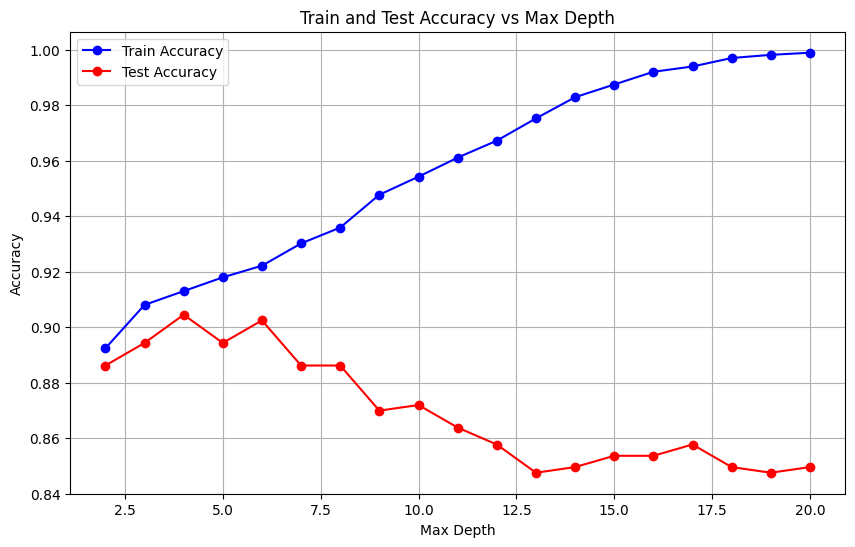

In [13]:
train_accuracies = []
test_accuracies = []
max_depths = range(2, 21)

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    train_accuracies.append(dt.score(X_train, y_train))
    test_accuracies.append(dt.score(X_test, y_test))

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Train Accuracy', color='blue', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', color='red', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy vs Max Depth')
plt.legend()
plt.grid(True)
plt.show()

Observaciones finales
1. Mejor profundidad máxima: Basado en los resultados de la Actividad 1, la mejor profundidad máxima es 3, ya que proporciona un buen equilibrio entre precisión en entrenamiento y prueba.
2. Sobreajuste: A profundidades mayores, la precisión en el conjunto de entrenamiento sigue aumentando, pero la precisión en el conjunto de prueba disminuye, indicando sobreajuste.
3.  Recomendación: Usar validación cruzada para confirmar la profundidad óptima y evitar el sobreajuste.